In [101]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import talib as talib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from textblob import TextBlob
from script.loader import load_data
from script.plotter import plot_data

In [19]:
AAPL=load_data('data/AAPL_historical_data.csv')
AMZN=load_data('data/AMZN_historical_data.csv')
GOOGL=load_data('data/GOOG_historical_data.csv')
MSFT=load_data('data/MSFT_historical_data.csv')
TSLA=load_data('data/TSLA_historical_data.csv')
META=load_data('data/META_historical_data.csv')
NVDA=load_data('data/NVDA_historical_data.csv')

In [20]:
print("Apple historical data\n", AAPL.head(5))
print("Amazon historical data\n", AMZN.head(5))
print("Google historical data\n", GOOGL.head(5))
print("Microsoft historical data\n", MSFT.head(5))
print("Tesla historical data\n", TSLA.head(5))
print("Meta historical data\n", META.head(5))
print("Nvidia historical data\n", NVDA.head(5))

Apple historical data
          Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Amazon historical data
          Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417

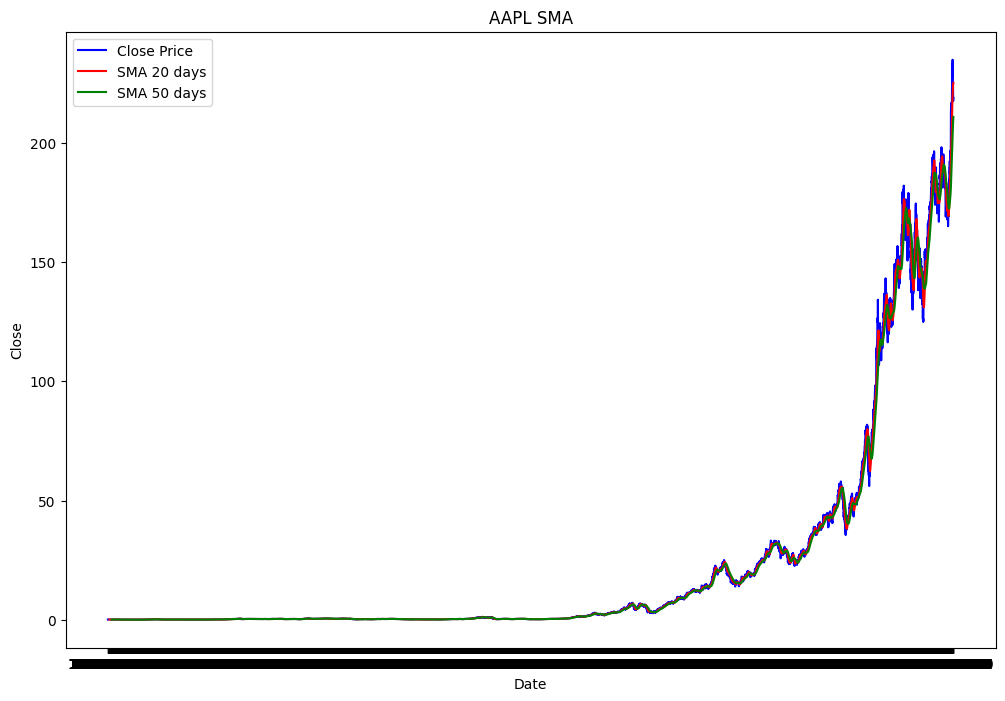

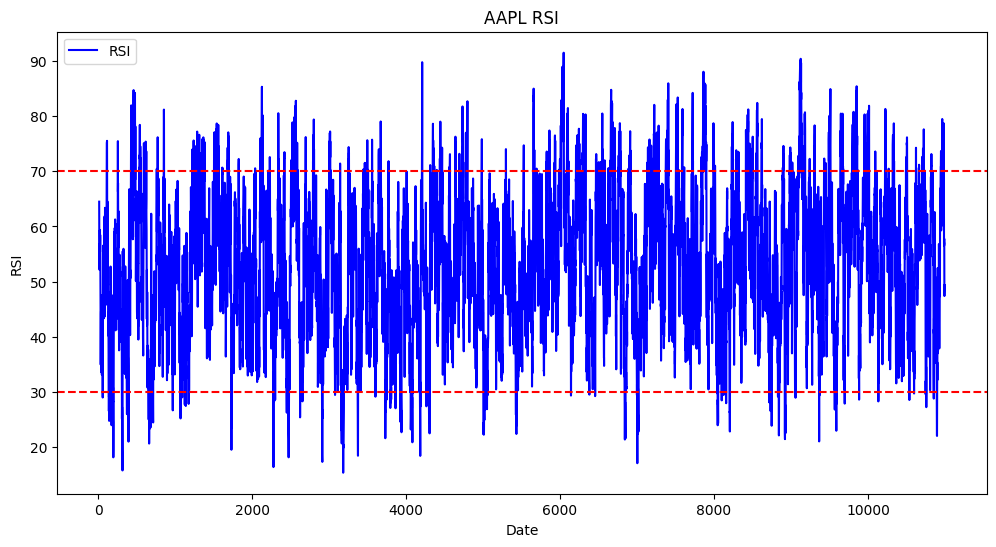

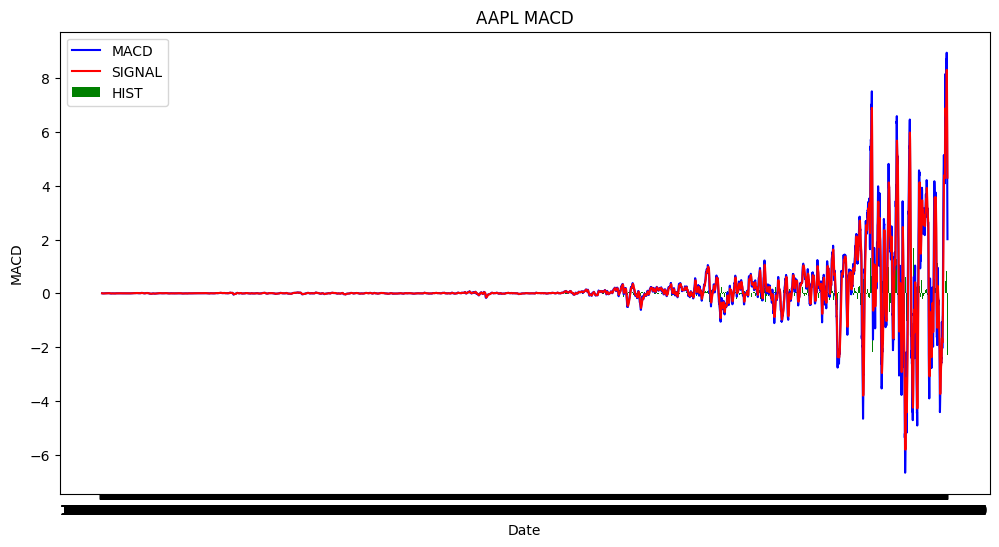

In [103]:
# Moving averages
AAPL['SMA_20'] = talib.SMA(AAPL['Close'], timeperiod=20)
AAPL['SMA_50'] = talib.SMA(AAPL['Close'], timeperiod=50)

# RSI
AAPL['RSI'] = talib.RSI(AAPL['Close'], timeperiod=14)

AAPL['MACD'], AAPL['MACD_SIGNAL'], AAPL['MACD_HIST'] = talib.MACD(AAPL['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

plt.figure(figsize=(12,8))
plt.plot(AAPL['Date'], AAPL['Close'], label='Close Price', color = 'blue')
plt.plot(AAPL['Date'], AAPL['SMA_20'], label='SMA 20 days', color = 'red')
plt.plot(AAPL['Date'], AAPL['SMA_50'], label='SMA 50 days', color = 'green')
plt.legend(loc='upper left')
plot_data('AAPL SMA', 'Date', 'Close')

plt.figure(figsize=(12, 6))
plt.plot(AAPL['RSI'], label='RSI', color='b') 
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='r', linestyle='--')
plt.legend(loc='upper left')
plot_data('AAPL RSI', 'Date', 'RSI')

#MACD
plt.figure(figsize=(12, 6))
plt.plot(AAPL['Date'], AAPL['MACD'], label='MACD', color = 'blue')
plt.plot(AAPL['Date'], AAPL['MACD_SIGNAL'], label='SIGNAL', color = 'red')
plt.bar(AAPL['Date'], AAPL['MACD_HIST'], label='HIST', color = 'green')
plt.legend(loc='upper left')
plot_data('AAPL MACD', 'Date', 'MACD')


In [14]:
#changing pynance to yfinance
import yfinance as yf

In [21]:
APPL_data = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
AMZN_data = yf.download("AMZN", start="2023-01-01", end="2023-12-31")
GOOGL_data = yf.download("GOOGL", start="2023-01-01", end="2023-12-31")
MSFT_data = yf.download("MSFT", start="2023-01-01", end="2023-12-31")
TSLA_data = yf.download("TSLA", start="2023-01-01", end="2023-12-31")
META_data = yf.download("META", start="2023-01-01", end="2023-12-31")
NVDA_data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")

print("Apple data\n", APPL_data.head(5))
print("Amazon data\n", AMZN_data.head(5))
print("Google data\n", GOOGL_data.head(5))
print("Microsoft data\n", MSFT_data.head(5))
print("Tesla data\n", TSLA_data.head(5))
print("Meta data\n", META_data.head(5))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Apple data
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045044  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271088  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795578  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
Amazon data
 Price       Adj Close      Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN       AMZN      AMZN
Date                                  

In [30]:
# Add SMA, RSI and MACD to the data frame

APPL_data['SMA_20'] = talib.SMA(APPL_data[('Close', 'AAPL')].values, timeperiod=20)
APPL_data['SMA_50'] = talib.SMA(APPL_data[('Close', 'AAPL')].values, timeperiod=50)

APPL_data['RSI'] = talib.RSI(APPL_data[('Close', 'AAPL')].values, timeperiod=14)

APPL_data['MACD'], APPL_data['MACD_SIGNAL'], APPL_data['MACD_HIST'] = talib.MACD(APPL_data[('Close', 'AAPL')].values, fastperiod=12, slowperiod=26, signalperiod=9)

# Set Date as index
APPL_data.set_index(APPL_data.index.get_level_values('Date'), inplace=True)


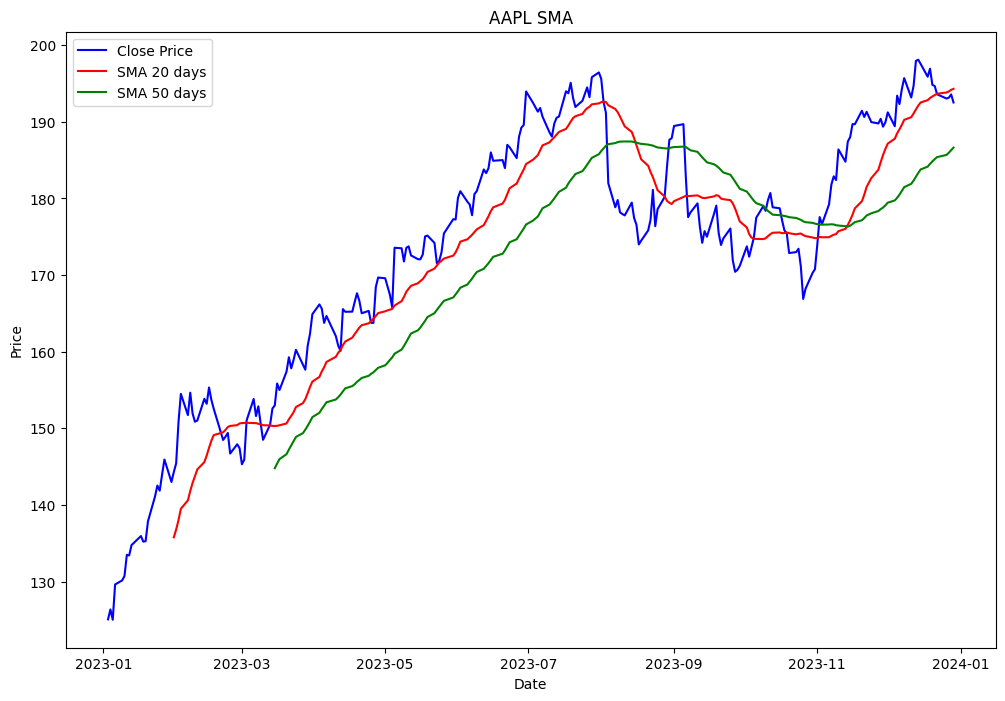

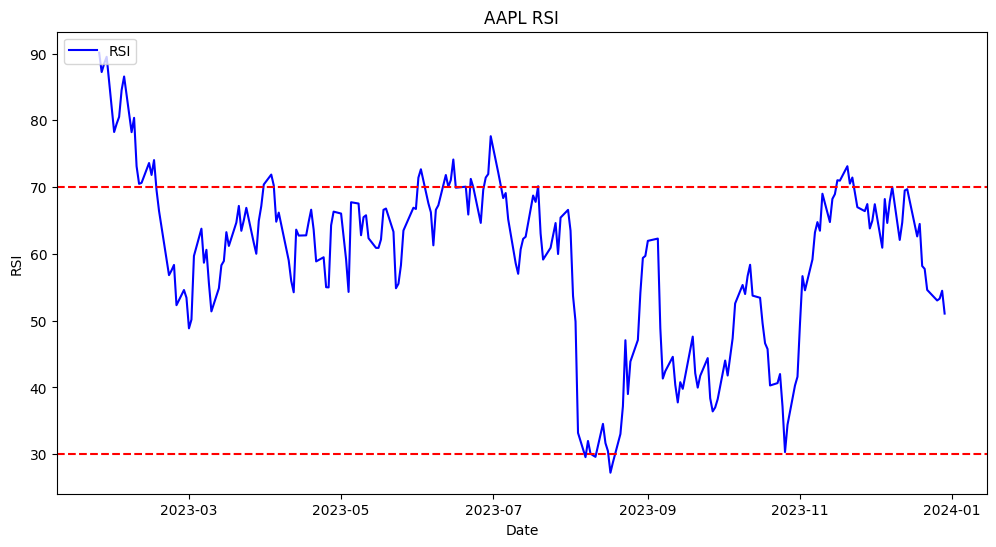

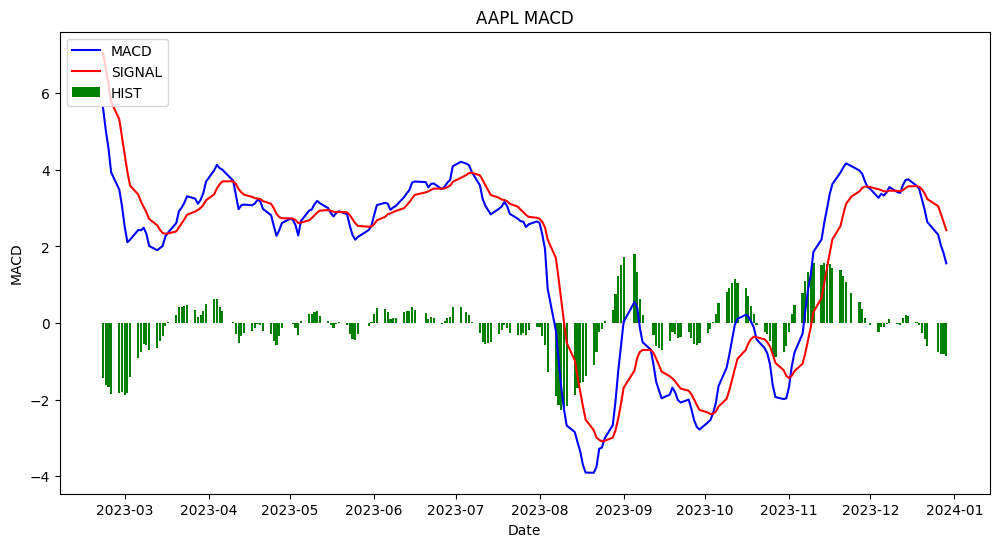

In [105]:
plt.figure(figsize=(12,8))
plt.plot(APPL_data.index, APPL_data[('Close', 'AAPL')], label='Close Price', color = 'blue')
plt.plot(APPL_data.index, APPL_data['SMA_20'], label='SMA 20 days', color = 'red')
plt.plot(APPL_data.index, APPL_data['SMA_50'], label='SMA 50 days', color = 'green')
plt.legend(loc='upper left')
plot_data('AAPL SMA', 'Date', 'Price')


plt.figure(figsize=(12, 6))
plt.plot(APPL_data.index, APPL_data['RSI'], label='RSI', color='b')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='r', linestyle='--')
plt.legend(loc='upper left')
plot_data('AAPL RSI', 'Date', 'RSI')


plt.figure(figsize=(12, 6))
plt.plot(APPL_data.index, APPL_data['MACD'], label='MACD', color = 'blue')
plt.plot(APPL_data.index, APPL_data['MACD_SIGNAL'], label='SIGNAL', color = 'red')
plt.bar(APPL_data.index, APPL_data['MACD_HIST'], label='HIST', color = 'green')
plt.legend(loc='upper left')
plot_data("AAPL MACD", "Date", "MACD")

In [53]:
newsdata=load_data('data/raw_analyst_ratings.csv')

In [75]:
# Date Alignment: 
newsdata.index = pd.to_datetime(newsdata.index, format='ISO8601')
APPL_data.index = pd.to_datetime(APPL_data.index, format='ISO8601')

# align both dataframes by date
newsdata = newsdata.sort_index()
APPL_data = APPL_data.sort_index()

newsdata.index = newsdata.index.normalize()
APPL_data.index = APPL_data.index.normalize()

print(newsdata.head(5))
print(APPL_data.head(5))


                           Unnamed: 0  \
date                                    
2009-02-14 00:00:00-04:00      883755   
2009-04-27 00:00:00-04:00      522587   
2009-04-27 00:00:00-04:00     1396488   
2009-04-29 00:00:00-04:00        1834   
2009-05-22 00:00:00-04:00       68387   

                                                                    headline  \
date                                                                           
2009-02-14 00:00:00-04:00                       How Treasuries and ETFs Work   
2009-04-27 00:00:00-04:00      Update on the Luxury Sector: 2nd Quarter 2009   
2009-04-27 00:00:00-04:00      Update on the Luxury Sector: 2nd Quarter 2009   
2009-04-29 00:00:00-04:00                             Going Against the Herd   
2009-05-22 00:00:00-04:00  Charles Sizemore Radio Interview Saturday Morning   

                                                                         url  \
date                                                                   

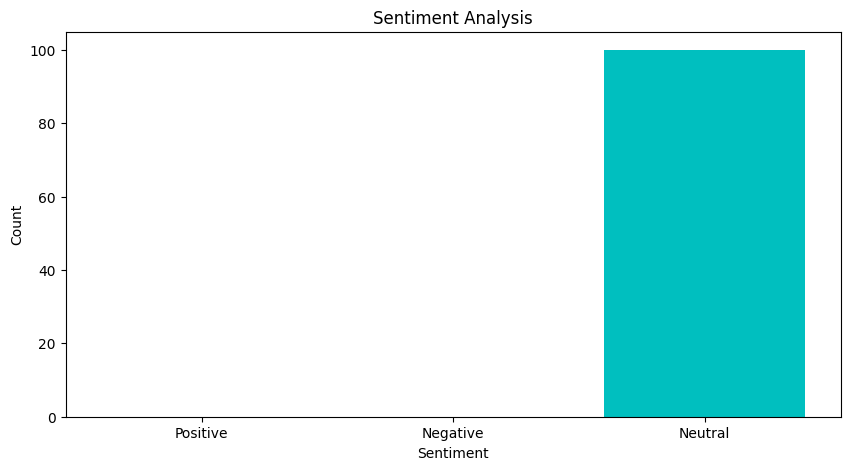

   Unnamed: 0                                       headline  \
0      883755                   How Treasuries and ETFs Work   
1      522587  Update on the Luxury Sector: 2nd Quarter 2009   
2      522587  Update on the Luxury Sector: 2nd Quarter 2009   
3      522587  Update on the Luxury Sector: 2nd Quarter 2009   
4      522587  Update on the Luxury Sector: 2nd Quarter 2009   

                                                 url  \
0  https://www.benzinga.com/28044/how-treasuries-...   
1  https://www.benzinga.com/charles-lewis-sizemor...   
2  https://www.benzinga.com/charles-lewis-sizemor...   
3  https://www.benzinga.com/charles-lewis-sizemor...   
4  https://www.benzinga.com/charles-lewis-sizemor...   

                    publisher stock  \
0                Paco Ahlgren   NAV   
1  Charles Lewis Sizemore CFA    FT   
2  Charles Lewis Sizemore CFA    FT   
3  Charles Lewis Sizemore CFA    FT   
4  Charles Lewis Sizemore CFA    FT   

                             original_headl

In [106]:
# sentiment analysis
sentiment_analysis = []
for headline in newsdata['headline'].head(100):
    sentiment = TextBlob(headline).sentiment
    sentiment_analysis.append({
        "original_headline": headline,
        "sentiment": sentiment,
        "sentiment_category": "Positive" if sentiment.polarity > 0.5 else ("Negative" if sentiment.polarity < -0.5 else "Neutral")
    })
    
# sentiment counts
sentiment_categories = ["Positive", "Negative", "Neutral"]
sentiment_values = [len([s for s in sentiment_analysis if s["sentiment_category"] == "Positive"]),
                    len([s for s in sentiment_analysis if s["sentiment_category"] == "Negative"]),
                    len([s for s in sentiment_analysis if s["sentiment_category"] == "Neutral"])]

# create bar plot
plt.figure(figsize=(10, 5))
plt.bar(sentiment_categories, sentiment_values, color='c')
plot_data('Sentiment Analysis', 'Sentiment', 'Count')

# assign sentiment scores to headlines.
newsdata['sentiment'] = [TextBlob(headline).sentiment.polarity for headline in newsdata['headline']]
newsdata['sentiment_category'] = ['Positive' if sentiment > 0.5 else ('Negative' if sentiment < -0.5 else 'Neutral') for sentiment in newsdata['sentiment']]
print(newsdata.head(5))



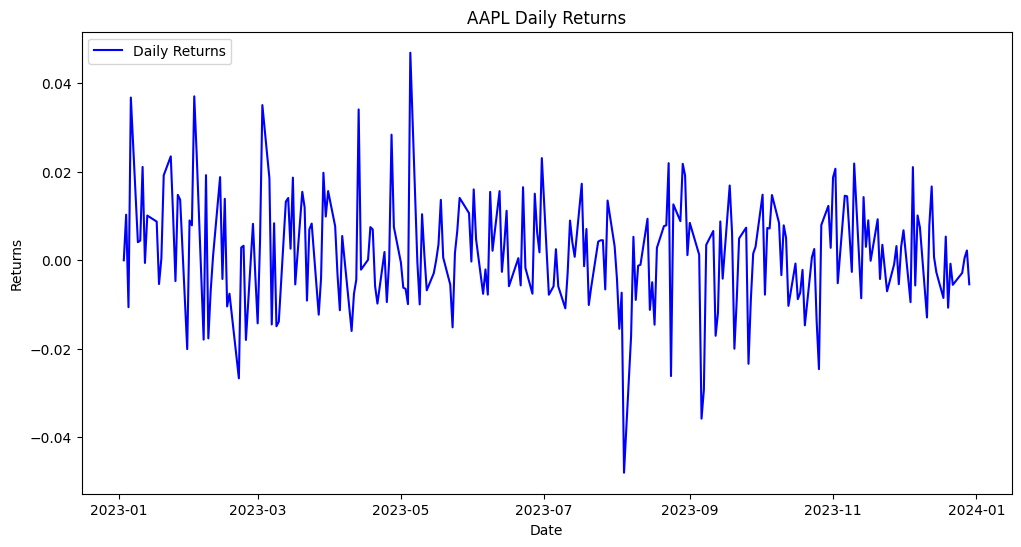

In [107]:
# daily returns
APPL_data['daily_returns'] = APPL_data[('Close', 'AAPL')].pct_change()
APPL_data['daily_returns'] = APPL_data['daily_returns'].fillna(0)

#visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(APPL_data.index, APPL_data['daily_returns'], label='Daily Returns', color='b')
plt.legend(loc='upper left')
plot_data('AAPL Daily Returns', 'Date', 'Returns')

nan


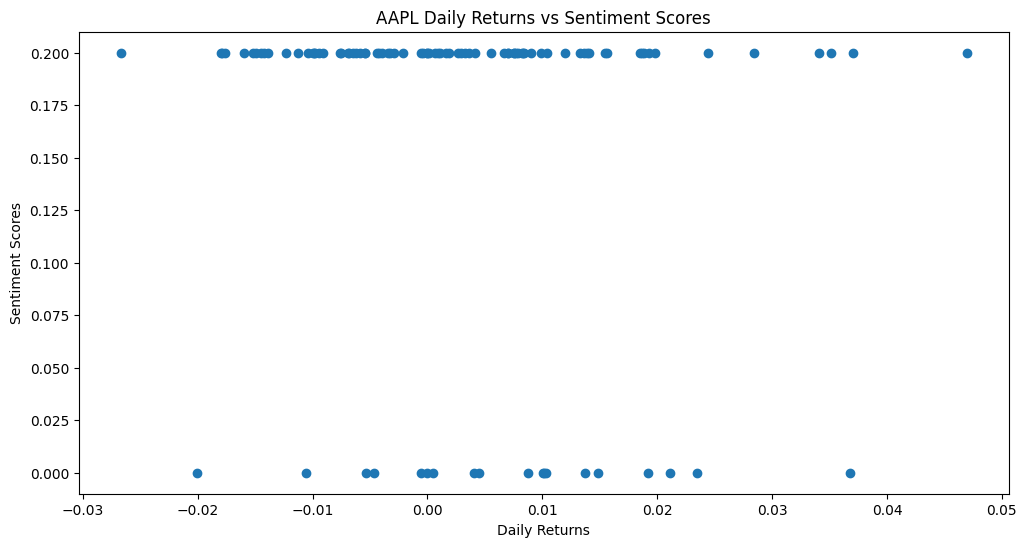

In [108]:
# lets do a correlation analysis between daily returns and sentiment scores on the sentiment category
correlation = APPL_data['daily_returns'].corr(newsdata['sentiment'])
print(correlation)

App_vis=APPL_data.head(100)
news_vis=newsdata.head(100)

#visualize the correlation
plt.figure(figsize=(12, 6))
plt.scatter(App_vis['daily_returns'], news_vis['sentiment'])
plot_data('AAPL Daily Returns vs Sentiment Scores', 'Daily Returns', 'Sentiment Scores')